#  Plan Adaptación
* Importar librerias
* Validar archivos y bases origen
* RSS
* Tweets
* Guardar en Data Base
## Validar cambios
* Probar librerias aprendidas

### instalacion en Español

Intalación
SentimentClassifier()  Español
pip install --upgrade scikit-learn==0.20.3  (instalar la versión 22 para python 3.8)
ERROR: Failed building wheel for scikit-learn


conda install -c anaconda scikit-learn

Antes descargar

 https://visualstudio.microsoft.com/visual-cpp-build-tools/


https://www.youtube.com/watch?v=kRVJFhFDuYA  minuto 11.40
* Seguir las instrucciones de los comentarios
* pip install spanish_sentiment_analysis
* Reiniciar Anaconda
* pip install -U scikit-learn scipy matplotlib  (no es segura que sea esto)

In [1]:
 #https://visualstudio.microsoft.com/visual-cpp-build-tools/

SyntaxError: invalid syntax (Temp/ipykernel_24488/3650372607.py, line 1)

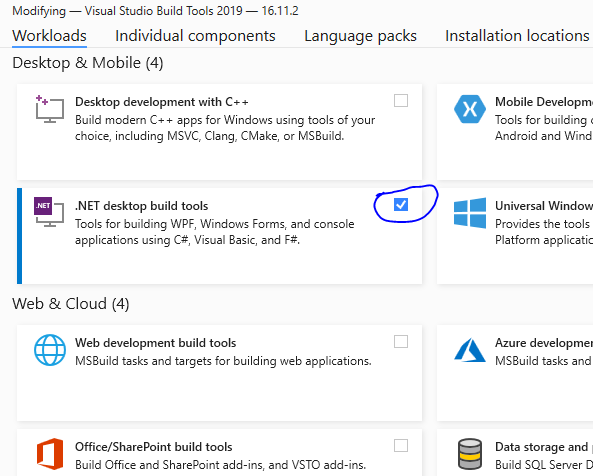

## Importar librerias

In [10]:
# Analisis de Sentimientos
##librerias ingles
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


#librerías Español
import joblib
#import sklearn.external.joblib as extjoblib
from  classifier import SentimentClassifier
#from classifier import *
clf = SentimentClassifier()

# importaciones Tokenizacion

import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
pst = PorterStemmer()
import string
from nltk.probability import FreqDist
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')
stopWEnglish = set(stopwords.words('english'))
stopWSP = set(stopwords.words('spanish'))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\CristhianJohnatanIzq\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\ProgramData\Anaconda3\envs\T\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CristhianJohnatanIzq\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CristhianJohnatanIzq\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stop

In [11]:
# importacion de dependencias
import tweepy
import json, re
import pandas as pd

#RSS importaciones
import feedparser
from datetime import datetime
from time import mktime

# Manejo de Fechas
from datetime import datetime
from time import mktime
import time
import datetime
fechaHoy=datetime.datetime.now().date()
from datetime import *

In [12]:
import nltk
import pyLDAvis.gensim_models
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import gensim

C:\ProgramData\Anaconda3\envs\T\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [13]:
from sentiment_analysis_spanish import sentiment_analysis
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

### Definición Métodos

#### Funciones para limpieza

In [14]:
"holaPerros"[0:4]

'hola'

In [15]:
def limpiar_terminos(texto):    
    texto=" ".join(filter(lambda x:x[0]!='#', texto.split()))
    texto=" ".join(filter(lambda x:x[0]!='@', texto.split()))
    texto=" ".join(filter(lambda x:x[0:4]!='http', texto.split()))
    return texto

In [16]:
def limpiar_texto(texto):
    """
    Función para realizar la limpieza de un texto dado.
    """    
    texto=limpiar_terminos(texto)
    
    # Eliminamos los caracteres especiales
    texto = re.sub(r'\W', ' ', str(texto))
    texto = re.sub(r'\d', ' ', str(texto))
    # Eliminamos comas y /
    texto = re.sub(r',', ' ', str(texto))
    texto = re.sub(r'/', ' ', str(texto))
    # Eliminado las palabras que tengo un solo caracter
    texto = re.sub(r'\s+[a-zA-Z]\s+', ' ', texto)
    # Sustituir los espacios en blanco en uno solo
    texto = re.sub(r'\s+', ' ', texto, flags=re.I)
    # remover \n
    #texto = re.sub(r'\n', '', texto)
    texto = texto.replace('\n', '')
    texto = texto.replace('º', '')    
      
    # Convertimos textos a minusculas
    texto = texto.lower()
    return texto

In [17]:
def analisisSentimientosIngles(text):
    resultado = sid.polarity_scores(text)
    return resultado["compound"]

## enEspañol
def analisisSentimientosEspanol(text):
    resultado= clf.predict(text)
    resultado= resultado*2-1
    #resultado= resultado
    return resultado


def seleccionAnalisis(fila):
    if fila["lang"] == "en" :
        return analisisSentimientosIngles(str(fila["full_text"]))
    elif fila["lang"] == "es" :
        return analisisSentimientosEspanol(str(fila["full_text"]))

#tokenizacion
def tokenizcionIngles(text):
    textPunt = text.translate(str.maketrans('','',string.punctuation))
    textPunt = textPunt.translate(str.maketrans('','','1234567890'))
    textPunt = textPunt.translate(str.maketrans('','','’'))
    textPunt = textPunt.translate(str.maketrans('','',"''"))
    textPunt = textPunt.translate(str.maketrans('','','✅'))
    textMin = word_tokenize(textPunt.lower())
    textSW = [x for x in textMin if x not in stopWEnglish]
    tokenStm = [None] * len(textSW)
    for i in range(0, len(textSW)):
        tokenStm[i]=pst.stem(textSW[i])
    return tokenStm
    #fdist = FreqDist(tokenStm)
    #return pd.DataFrame(fdist.items(), columns=['word', 'frec'])

def tokenizcionEspanol(text):
    textPunt = text.translate(str.maketrans('','',string.punctuation))
    textPunt = textPunt.translate(str.maketrans('','','1234567890'))
    textPunt = textPunt.translate(str.maketrans('','','’'))
    textPunt = textPunt.translate(str.maketrans('','',"'"))
    textPunt = textPunt.translate(str.maketrans('','','✅'))
    #quitarHasTags
    
    ##textMin = filter(lambda x:x[0]!='#', word_tokenize(textPunt.lower()))
    textMin = word_tokenize(textPunt.lower())    
    
    textSW = [x for x in textMin if x not in stopWSP]
    textSW = [x for x in textSW if x not in word_rem['Palabras'].values] 
    stemmed_text = [stemmer.stem(i) for i in textSW]
    return stemmed_text
    #fdist = FreqDist(stemmed_text)
    #return pd.DataFrame(fdist.items(), columns=['word', 'frec'])

def seleccionTokenizacion(fila,var):
    if fila["lang"] == "en" :
        return tokenizcionIngles(str(fila[var]))
    elif fila["lang"] == "es" :
        return tokenizcionEspanol(str(fila[var]))


#RSS definicion de métodos
def parse(url):
    return feedparser.parse(url)

def get_source(parsed):
    feed= parsed['feed']
    return {
        'link': feed['link'],
        'title': feed['title'],
        'subtitle': feed['subtitle']
    }

def get_articles(parsed):
        articles = []
        entries= parsed['entries']
        for entry in entries:
            articles.append({
                'id': entry['id'],
                'link': entry['link'],
                'title': entry['title'],
                'summary':entry['summary'],
                'published': entry['published_parsed']                
            })
        return articles
    
def get_articles_resultado(parsed,fuenteRSS):
        articles = []
        entries= parsed['entries']
        for entry in entries:
            #partDate =entry['published_parsed'].replace('(','')replace(')','').split(",")
            #almacenarFuente            
            # validacion si falta una dato            
            if 'summary' not in entry :
                entry['summary']=""
            if 'title' not in entry :
                entry['title']=""    
            articles.append({
                'fuenteRss':fuenteRSS,
                'idP': entry['id'],                
                'texto': entry['title']+". "+entry['summary'],
                'published': entry['published_parsed']                
            })
        return articles
    
def getFechaFromRss(fechaStruct):
    #print (fechaStruct)
    if fechaStruct is None:
        #print ("entro")
        return datetime.now()
    else:
        return datetime.fromtimestamp(mktime(fechaStruct))

In [18]:
### Funciones para modelo de tópicos
def make_bigrams(texts,bigram_mod):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts,bigram_mod,trigram_mod):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def impresionTopicos(mod,nPalabras,nTopicos):
    topicos = mod.print_topics(num_words=nPalabras, num_topics=nTopicos)
    for topico in topicos:
        print(topico)    
        
def impresionTopicosLimp(mod,nPalabras,nTopicos):
    #Impresion limpia de Tópicos
    topicos = mod.print_topics(num_words=nPalabras, num_topics=nTopicos)
    i=0
    for topico in topicos:
        i=i+1
        textoAux = re.sub(r'\W', ' ', str(topico))
        textoAux = re.sub(r'\s+[a-zA-Z]\s+', ' ', textoAux)
        textoAux = re.sub(r'[0-9]', ' ', textoAux)
        textoAux = re.sub(r'\s+', ' ', textoAux, flags=re.I)
        print(str(i),textoAux)

In [19]:
### LISTA DE PALABRAS A REMOVER
#word_rem=['https_co',http_co,rt]

In [20]:
word_rem=pd.read_csv("palabrasRemover.csv", sep=';',encoding = "ISO-8859-1", engine='python')

In [21]:
word_rem['Palabras'].values

array(['https', 'http', 'rt', 'co', 'colombia', 'hoy', 'bogota',
       'colombiano', 'colombiana', 'colombianos', 'colombianas', 'hace',
       'hacer', 'hacen'], dtype=object)

In [22]:
stopWSP

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

###  Tweeter

In [23]:
###TWEETER
# autenticación
# keys and tokens from the Twitter Dev Console 
consumer_key = '5BOcNnQsuIxDTBejlZ75xBqZ0'
consumer_secret = 'c6Cnx7SItN5Gda6K8hgtPo3tPyI18TU9eUh28jx3d4lDceewiG'
access_token = '927023579727884288-1jTaXF5wmUbX2NeYzUcSlmzXQMca4kU'
access_token_secret = 'Y62wUwgoWjfHGw5S0jlYH7w8ulmlRzaFcxbGjBP0wLin9'

#creación del objeto para extraer información
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
#obtejo
api= tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
# si llega al cupo espera y continua

pd.set_option("display.max_colwidth", 100)
df=pd.read_csv("AmigosTweetter_base_V2.csv", sep=';',encoding = "ISO-8859-1", engine='python', index_col="id")

#Cargar Tweets
tweets = []
fechaDelTweetAnterior=fechaHoy
    
for index, row in df.iterrows():
    #for amigo in df:
    i=0
    print(str(i)+" "+row['screen_name'])
    tweetsAmigo=tweepy.Cursor(api.user_timeline, screen_name=row['screen_name'], tweet_mode="extended").items(row['NoTweets'])
    for tweet in tweetsAmigo:
        tweets.append({
            'id':tweet.id,
            'full_text':tweet.full_text,
            'created_at':tweet.created_at,
            #'lang':row['Idioma'],
            'lang':tweet.lang,
            'id_fuente':row['screen_name']
        })
    i=i+1                

0 sergiodigra
0 Victor_Malagon
0 jscorrales
0 _minecogob
0 elEconomistaes
0 FT
0 rodriguezbraun
0 josecdiez
0 suanzes
0 wef
0 ecofeminita
0 epeconomia
0 RevistaDinero
0 bbcmundo
0 BluRadioCo
0 elespectador
0 RevistaSemana
0 ELTIEMPO
0 elcolombiano
0 lafm
0 NoticiasRCN
0 rcnradio
0 MailOnline
0 clarincom
0 NBCNews
0 rcnmundo
0 CaracolRadio
0 NoticiasCaracol
0 NTN24
0 NASA
0 PublimetroCol
0 Adcamach
0 Adriana_Guzman
0 agaviriau
0 AlbertoBernalLE
0 alhosu
0 amaldon19
0 Anamibanez
0 BancoRepublica
0 BvcColombia
0 CamiloDeGuzman
0 carlos_g_ospino
0 castellanosgd
0 CehernandezEcon
0 Cesaretamayo
0 estebanpie
0 Fedesarrollo
0 FocoEconomico
0 Fondosdepension
0 freddykastro
0 IECarballo
0 jagallegod
0 japebu
0 JavierMejiaC
0 jleibovi
0 Jllanosala
0 JoMalagon
0 JorgeARestrepo
0 JorgeATovar
0 JoseILOPEZ
0 jrobertoacosta1
0 juanf_vargas
0 juansrobledo
0 JusTributaria
0 LeopoldoTweets
0 LuisFelipeHenao
0 LuisFerMejia
0 mahofste
0 MantillaIgnacio
0 mariovalencia01
0 MauricioCard
0 Maurotov
0 Melende

TweepError: Twitter error response: status code = 401

###  Validar Análisis sentimientos

### prueba algoritmo sqdm

###  Limpiar Texto

In [24]:
tweetsDF=pd.DataFrame(tweets)
pd.set_option('display.max_colwidth', -1)
tweetsDFProcesado=tweetsDF.copy()
### limpiar texto
tweetsDFProcesado["full_text_Limpio"]=tweetsDFProcesado.full_text.apply(limpiar_texto)

In [25]:
tweetsDFProcesado.sample(10)

,id,full_text,created_at,lang,id_fuente,full_text_Limpio
3146,1438862856368308230,RT @n_urdaneta13: Les comparto un artículo de @elespectador acerca de mi tesis de maestría. Me hace muy feliz ver que mi trabajo está siend…,2021-09-17 13:50:12,es,Adcamach,rt les comparto un artículo de acerca de mi tesis de maestría me hace muy feliz ver que mi trabajo está siend
3513,1322170791153324033,"@saxena_puru ""The excess return in the stock market is higher under Democratic than Republican presidencies: 9 percent for the value-weighted and 16 percent for the equal-weighted portfolio""\n\nhttps://t.co/UZzjB1GnCT",2020-10-30 13:37:36,en,alhosu,the excess return in the stock market is higher under democratic than republican presidencies percent for the value weighted and percent for the equal weighted portfolio
3961,1453109995294191616,#Noticia | Avianca apunta a domicilio británico pero juez no confirmó reorganización https://t.co/fvlmmCbnb7 a través de @eltiempo,2021-10-26 21:23:15,es,BvcColombia,avianca apunta domicilio británico pero juez no confirmó reorganización través de
4221,1437429958230659073,"Me enteré de que los turistas no pueden viajar a Providencia. Tal vez los turistas estresen los limitados recursos de la isla, pero también gastan, lo cual debería ayudar a su recuperación. ¿Tiene sentido que uno no pueda ir a gastar allá?",2021-09-13 14:56:22,es,castellanosgd,me enteré de que los turistas no pueden viajar providencia tal vez los turistas estresen los limitados recursos de la isla pero también gastan lo cual debería ayudar su recuperación tiene sentido que uno no pueda ir gastar allá
6592,1450241236225470469,"RT @JorgeARestrepo: Planeación, no expropiación; menos compras de tierras productivas y explotadas, ofrecía Luis Carlos Galán en 1988, a di…",2021-10-18 23:23:49,es,LuisFelipeHenao,rt planeación no expropiación menos compras de tierras productivas explotadas ofrecía luis carlos galán en di
1503,1455366804352614407,"“De re coquinaria”, el secreto gastronómico de la antigua Roma https://t.co/eYqJITaIFr https://t.co/AmRCM4OG5r",2021-11-02 02:51:00,es,elespectador,de re coquinaria el secreto gastronómico de la antigua roma
3808,1454147757334306821,✅La decisión de incrementar la tasa en 50 puntos básicos fue por mayoría de 5 a 2. Dos integrantes de la Junta votaron por un incremento de 25 puntos básicos.,2021-10-29 18:06:56,es,BancoRepublica,la decisión de incrementar la tasa en puntos básicos fue por mayoría de dos integrantes de la junta votaron por un incremento de puntos básicos
1792,1455202001403490305,Esta millonada valdría pagar un viaje al espacio en pesos colombianos 🚀 → https://t.co/e0OEUVULad https://t.co/Wf3KGOxpd9,2021-11-01 15:56:08,es,ELTIEMPO,esta millonada valdría pagar un viaje al espacio en pesos colombianos
5787,1453098663870406666,RT @silvia_otero85: Yo aceptaría espacios free of kids si a cambio se crean espacios free of pets porque estoy aburrida de que mis hijos ju…,2021-10-26 20:38:13,es,JorgeARestrepo,rt yo aceptaría espacios free of kids si cambio se crean espacios free of pets porque estoy aburrida de que mis hijos ju
5910,1453513453629546503,"RT @corficolombiana: Hoy realizamos en #Cali nuestra tercera charla nacional con clientes. El evento, liderado por nuestro Director de Inve…",2021-10-28 00:06:26,es,JoseILOPEZ,rt hoy realizamos en nuestra tercera charla nacional con clientes el evento liderado por nuestro director de inve


### Plan
* listado de topicos general
* observación y seleccion de palabras
* filtro de mensajes a revisar
* validación polariadad con la selección

In [26]:
tweetsDFProcesado['tokens']=tweetsDFProcesado.apply(lambda x: seleccionTokenizacion(x,'full_text_Limpio'), axis=1)

In [27]:
tweetsDFProcesado[tweetsDFProcesado['lang']=='es'].sample(20)

,id,full_text,created_at,lang,id_fuente,full_text_Limpio,tokens
6238,1446482161981345795,@juliantorresa Los precios altos generarán incentivos a productores y otras empresas a desarrollar productos sustitutos. \n\nControlar precios limitarán esos incentivos a innovar.,2021-10-08 14:26:36,es,juansrobledo,los precios altos generarán incentivos productores otras empresas desarrollar productos sustitutos controlar precios limitarán esos incentivos innovar,"[preci, altos, gener, incent, productor, empres, desarroll, product, sustitut, control, preci, limit, incent, innov]"
1313,1455323026292158467,¿Confiarías en Facebook para esta nueva forma de Internet?\n\nhttps://t.co/kMWZj0o9kZ,2021-11-01 23:57:02,es,bbcmundo,confiarías en facebook para esta nueva forma de internet,"[confi, facebook, nuev, form, internet]"
5782,1453116546130354178,RT @creenergia: #COP26 | La COP se reúne todos los años a menos de que las partes decidan lo contrario. El primer encuentro se celebró en B…,2021-10-26 21:49:16,es,JorgeARestrepo,rt la cop se reúne todos los años menos de que las partes decidan lo contrario el primer encuentro se celebró en,"[cop, reun, años, men, part, decid, contrari, prim, encuentr, celebr]"
253,1251210763232034821,"RT @MauricioCard: Les comparto estas cifras, cortesía de @cfernandezmejia (soy su feliz marido). Les aseguro que las vamos a necesitar, así…",2020-04-17 18:07:46,es,jscorrales,rt les comparto estas cifras cortesía de soy su feliz marido les aseguro que las vamos necesitar así,"[compart, cifr, cortes, feliz, mar, asegur, vam, necesit, asi]"
8180,1182378391045103618,@RodLuisAlberto @DNP_Colombia @PactoColombiaPE ¡Muchas gracias! Fue una gran experiencia hacer equipo y que ahora lideres un grupo de profesionales comprometidos y preparados. Estoy seguro que continuarán buenos tiempos para @DNP_Colombia,2019-10-10 19:32:30,es,rafaelpuyana,muchas gracias fue una gran experiencia hacer equipo que ahora lideres un grupo de profesionales comprometidos preparados estoy seguro que continuarán buenos tiempos para,"[much, graci, gran, experient, equip, ahor, lider, grup, profesional, compromet, prepar, segur, continu, buen, tiemp]"
7988,1445720982015053824,"@DanielPerico Era fácil regularlo. Lo primero hubiera sido no entregarle los derechos del libro a una firma ""neoliberal"" que quiere ""extraerle el bienestar al pueblo"" y que va comercializarlo a través de otras firmas ""neoliberales"". Luego de eso, existen los contratos. Sin ""estupideces"".",2021-10-06 12:01:56,es,OskarNupia,era fácil regularlo lo primero hubiera sido no entregarle los derechos del libro una firma neoliberal que quiere extraerle el bienestar al pueblo que va comercializarlo través de otras firmas neoliberales luego de eso existen los contratos sin estupideces,"[facil, regul, primer, sid, entreg, derech, libr, firm, neoliberal, quier, extra, bienest, puebl, va, comercializ, traves, firm, neoliberal, lueg, exist, contrat, estupidec]"
2764,1455185358870691843,Ineos ya tendría decidido los planes para Egan Bernal y Richard Carapaz en 2022 https://t.co/KhBOhHtL6P,2021-11-01 14:50:00,es,NoticiasCaracol,ineos ya tendría decidido los planes para egan bernal richard carapaz en,"[ine, decid, plan, egan, bernal, richard, carapaz]"
5399,1436105301779001349,RT @lyygarcia: Por aprender:\n“Competir y cooperar es posible (…) hacer acuerdos cuando es necesario y combatir cuando corresponde. La armon…,2021-09-09 23:12:40,es,JavierMejiaC,rt por aprender competir cooperar es posible hacer acuerdos cuando es necesario combatir cuando corresponde la armon,"[aprend, compet, cooper, posibl, acuerd, necesari, combat, correspond, armon]"
135,1451599091486662660,"RT @bio_reto_xxi: ""Con #ColombiaCientífica le estamos entregando al país una nueva forma de hacer ciencia, tecnología e innovación, y una n…",2021-10-22 17:19:27,es,Victor_Malagon,rt con le estamos entregando al país una nueva forma de hacer ciencia tecnología innovación una,"[entreg, pais, nuev, form, cienci, tecnolog, inno

In [28]:
tweetsDFProcesado["lang"].value_counts()

es     7142
en     1303
und    178 
ca     24  
pt     19  
fr     8   
it     6   
et     4   
de     3   
tr     2   
lv     2   
ht     2   
in     2   
tl     2   
eu     1   
hu     1   
ro     1   
Name: lang, dtype: int64

###  Listado tokens general  Español

###  Separar los textos en Español y en Ingles

In [29]:
tweetsEspañol=tweetsDFProcesado[tweetsDFProcesado['lang']=='es']

In [30]:
Lista_general=[]
listAux = tweetsEspañol["tokens"].tolist()
listAux = [x for x in listAux if x!= []]
#print(column, len(listAux))
Lista_general = Lista_general+listAux

In [31]:
Lista_general

[['trabaj', 'rein', 'unid', 'enfrent', 'excepci'],
 ['ministr', 'luj'],
 ['sig',
  'impresion',
  'avanc',
  'ecuador',
  'luch',
  'pais',
  'vacun',
  'millon',
  'person',
  'apen'],
 ['lleg',
  'mostr',
  'accion',
  'compromis',
  'cambi',
  'climat',
  'graci',
  'sg',
  'pm'],
 ['apoy',
  'gobiern',
  'frances',
  'elabor',
  'ambici',
  'estrategi',
  'climat',
  'larg',
  'plaz',
  'establec'],
 ['complac',
  'calur',
  'bienven',
  'pm',
  'rein',
  'unid',
  'compromis',
  'ser',
  'par'],
 ['glasgow', 'ratific', 'compromis', 'luch', 'particip', 'pais'],
 ['present', 'estrategi', 'climat', 'larg', 'plaz'],
 ['desterr', 'azot', 'climat', 'import', 'not', 'alc', 'siempr', 'luci'],
 ['gratitud',
  'humild',
  'recib',
  'nombr',
  'equip',
  'viceministeri',
  'relacion',
  'polit',
  'gener'],
 ['apertur', 'nuev', 'sed', 'pais', 'recib', 'alegr', 'vem', 'oportun', 'par'],
 ['creacion',
  'fond',
  'singul',
  'import',
  'mpi',
  'amunafr',
  'dad',
  'vien',
  'trabaj',
  'pr

In [32]:
bigram = gensim.models.Phrases(Lista_general, min_count=5, threshold=10) 
trigram = gensim.models.Phrases(bigram[Lista_general], threshold=10)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

data_words_bigrams = make_bigrams(Lista_general,bigram_mod)

diccionario = Dictionary(data_words_bigrams)
print(f'Número de tokens: {len(diccionario)}')

diccionario.filter_extremes(no_below=2, no_above = 0.9)
print(f'Número de tokens: {len(diccionario)}')

corpus = [diccionario.doc2bow(noticia) for noticia in data_words_bigrams]

Número de tokens: 9382
Número de tokens: 5314


In [33]:
numeroTopicos=5

In [34]:
lda = LdaModel(corpus=corpus, id2word=diccionario, 
               num_topics=numeroTopicos, random_state=35, 
               chunksize=1000, iterations=200, passes=40, alpha='auto')

In [35]:
impresionTopicos(lda,10,20)

(0, '0.011*"dej" + 0.010*"bogot" + 0.009*"titul" + 0.009*"liberal" + 0.008*"convers" + 0.008*"abraz" + 0.007*"tom" + 0.007*"condicion" + 0.007*"director" + 0.007*"acompañ"')
(1, '0.020*"nuev" + 0.011*"gran" + 0.010*"mayor" + 0.010*"asi" + 0.009*"gobiern" + 0.009*"econom" + 0.009*"felicit" + 0.009*"habl" + 0.008*"program" + 0.008*"part"')
(2, '0.023*"graci" + 0.013*"acuerd" + 0.013*"esper" + 0.011*"estudi" + 0.009*"vid" + 0.009*"pod" + 0.008*"part" + 0.008*"cual" + 0.008*"impact" + 0.008*"sid"')
(3, '0.014*"años" + 0.011*"cas" + 0.008*"tiemp" + 0.008*"dat" + 0.008*"aun" + 0.008*"total" + 0.008*"pobr" + 0.008*"niñ" + 0.008*"cov" + 0.007*"viv"')
(4, '0.015*"si" + 0.011*"pais" + 0.010*"trabaj" + 0.009*"pued" + 0.008*"public" + 0.008*"pas" + 0.008*"vacun" + 0.008*"deb" + 0.007*"mejor" + 0.007*"buen"')


In [36]:
lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, diccionario, sort_topics=False)
pyLDAvis.display(lda_display)

In [38]:
sumaTopicos = [0]*(numeroTopicos+1)

In [39]:
for i in tweetsEspañol.index:
    #print(tweetsEspañol.loc[i,'tokens'])
    bow_comentario = diccionario.doc2bow(tweetsEspañol.loc[i,'tokens'])
    distribucion_noticia = lda[bow_comentario]
    dist_contrib = [topico[1] for topico in lda[bow_comentario]]
    tweetsEspañol.loc[i,'Tópico']=dist_contrib.index(max(dist_contrib))+1
    
    # sumar pertenencias a los tópicos
    for idx, val in enumerate(dist_contrib):
        sumaTopicos[idx+1]=sumaTopicos[idx+1]+dist_contrib[idx] 

In [40]:
tweetsEspañol.Tópico.value_counts()

5.0    4764
2.0    1029
4.0    522 
3.0    428 
1.0    399 
Name: Tópico, dtype: int64

In [41]:
type(sumaTopicos)

list

In [42]:
table_res=pd.DataFrame(sumaTopicos, columns = ['distribucion'])

In [43]:
table_res.sort_values('distribucion', ascending=False)

,distribucion
5,2662.473561
2,1534.018769
4,1081.859501
3,1031.046630
1,832.601539
0,0.000000


In [44]:
tweetsEspañol[tweetsEspañol['Tópico']==5].sample(60)

,id,full_text,created_at,lang,id_fuente,full_text_Limpio,tokens,Tópico
4066,1389599796202180619,"6. Construir cualquier cosa -una casa, un servicio, un negocio- es MUY difícil, y más si es un bien público.\n\nPermitir su destrucción va en detrimento de todos.\n\nTodos terminamos peor de lo que empezamos.\n\nPerdemos tiempo, recursos y la moral.\n\nTodos retrocedemos.",2021-05-04 15:16:23,es,CamiloDeGuzman,construir cualquier cosa una casa un servicio un negocio es muy difícil más si es un bien público permitir su destrucción va en detrimento de todos todos terminamos peor de lo que empezamos perdemos tiempo recursos la moral todos retrocedemos,"[constru, cualqui, cos, cas, servici, negoci, dificil, si, bien, public, permit, destruccion, va, detriment, termin, peor, empez, perd, tiemp, recurs, moral, retroced]",5.0
5629,1454811495498502146,"El acceso al programa Vivienda Social para el Campo es totalmente gratuito y no requiere de intermediarios. #QueNoLeEchenCuentos, no se deje estafar y denuncie ante la @PoliciaColombia o la @FiscaliaCol a quienes exijan dinero a cambio de subsidios de vivienda. https://t.co/Sbmf1fKy1K",2021-10-31 14:04:24,es,JoMalagon,el acceso al programa vivienda social para el campo es totalmente gratuito no requiere de intermediarios no se deje estafar denuncie ante la la quienes exijan dinero cambio de subsidios de vivienda,"[acces, program, viviend, social, camp, total, gratuit, requier, intermediari, dej, estaf, denunci, exij, diner, cambi, subsidi, viviend]",5.0
3634,1429434833764241414,RT @URosario: ¡Llega #LaceaLames2021 en su 26ª edición! El evento académico más importante en Economía de América Latina y el Caribe. Se de…,2021-08-22 13:26:36,es,amaldon19,rt llega en su ª edición el evento académico más importante en economía de américa latina el caribe se de,"[lleg, ª, edicion, event, academ, import, econom, amer, latin, carib]",5.0
1023,1453093812524384256,RT @FeminIndex: Si querés que quienes ocupen bancas en el Congreso luego de estas elecciones transparenten su compromiso con la agenda femi…,2021-10-26 20:18:56,es,ecofeminita,rt si querés que quienes ocupen bancas en el congreso luego de estas elecciones transparenten su compromiso con la agenda femi,"[si, queres, ocup, banc, congres, lueg, eleccion, transparent, compromis, agend, femi]",5.0
6455,1452469596351606784,"Además del enorme honor de acompañar los grados de @Uniandes con unas palabras, agradezco los generosos mensajes que he recibido desde entonces. Me animaron a compartir por acá el video (y con subtítulos): ""Orgullo y gratitud"". \n\nhttps://t.co/qisMRbDYD7",2021-10-25 02:58:32,es,LeopoldoTweets,además del enorme honor de acompañar los grados de con unas palabras agradezco los generosos mensajes que he recibido desde entonces me animaron compartir por acá el video con subtítulos orgullo gratitud,"[ademas, enorm, honor, acompañ, grad, unas, palabr, agradezc, gener, mensaj, recib, entonc, anim, compart, aca, vide, subtitul, orgull, gratitud]",5.0
4746,1406017858899951616,Deconstruyendo a Castillo | Por César Martinelli\nhttps://t.co/Pt4RMScnHZ,2021-06-18 22:35:54,es,FocoEconomico,deconstruyendo castillo por césar martinelli,"[deconstru, castill, ces, martinelli]",5.0
1968,1454930553631879169,Menos de 25 muertes por covid-19 se registraron este domingo: MinSalud https://t.co/mDPkEOqEa7,2021-10-31 21:57:29,es,lafm,menos de muertes por covid se registraron este domingo minsalud,"[men, muert, cov, registr, doming, minsalud]",5.0
4076,1389583143527649280,4. Hay ciertos derechos fundamentales para que la democracia funcione:\n\nLibertad de pensamiento y expresión\n\nLibertad de afiliación Y asamblea\n\nLibertad de protestar en paz,2021-05-04 14:10:13,es,CamiloDeGuzman,hay ciertos derechos fundamentales para que la democracia funcione libertad de pensamiento expresión libertad de afiliación asamblea libertad de protestar en paz,"[ciert, derech, fundamental, democraci, funcion, libert, pensamient, expresion, libert, afili, asamble, libert, 

###  Guardar datos en Base de Datos

#### fin topicos

In [45]:
tweetsDFProcesado['SentSQDM']=tweetsDFProcesado.full_text_Limpio.apply(sentiment.sentiment)*2-1

In [46]:
tweetsDFProcesado['SentTesis']=tweetsDFProcesado.full_text_Limpio.apply(analisisSentimientosEspanol)

In [47]:
#tweetsDFProcesado['SentNew']=tweetsDFProcesado.full_text_Limpio.apply(analisisSentimientosEspanol)

### Analisis de fuentes

In [48]:
pd.set_option('display.max_rows', None)

In [49]:
tweetsDFProcesado[tweetsDFProcesado['id_fuente']=='bbcmundo']

,id,full_text,created_at,lang,id_fuente,full_text_Limpio,tokens,SentSQDM,SentTesis
1300,1455362577970733061,"Wall Street puede caer al suelo, mientras sube la inflación y se desata una nueva ola de estallidos sociales. Esas son algunas de las proyecciones de riesgo mundial de un equipo de investigadores británicos\nhttps://t.co/mfufZJG5Al",2021-11-02 02:34:12,es,bbcmundo,wall street puede caer al suelo mientras sube la inflación se desata una nueva ola de estallidos sociales esas son algunas de las proyecciones de riesgo mundial de un equipo de investigadores británicos,"[wall, street, pued, caer, suel, mientr, sub, inflacion, desat, nuev, ola, estall, social, proyeccion, riesg, mundial, equip, investig, britan]",-0.996651,-0.588815
1301,1455356152968097797,El informe dice que las agencias de inteligencia siguen divididas sobre el origen más probable del virus.\n\nhttps://t.co/dkSdNpb0mo,2021-11-02 02:08:40,es,bbcmundo,el informe dice que las agencias de inteligencia siguen divididas sobre el origen más probable del virus,"[inform, dic, agenci, inteligent, sig, divid, orig, probabl, virus]",-0.999561,-0.583943
1302,1455350654541631497,"En su último libro, el neurobiólogo español Francisco Mora aborda “la verdadera gran revolución humana”: la lectura. De eso y su efecto en el cerebro, sobre todo de niños y adolescentes, hablará hoy en el @hayfestival_esp con @_anapais https://t.co/lvtcv4nJJK",2021-11-02 01:46:49,es,bbcmundo,en su último libro el neurobiólogo español francisco mora aborda la verdadera gran revolución humana la lectura de eso su efecto en el cerebro sobre todo de niños adolescentes hablará hoy en el con,"[ultim, libr, neurobiolog, español, francisc, mor, abord, verdader, gran, revolu, human, lectur, efect, cerebr, niñ, adolescent, habl]",-0.992082,0.485223
1303,1455345028717481985,El nuevo reglamento cambia la parte baja del bikini por un pantalón corto https://t.co/GbB9KVymB0,2021-11-02 01:24:28,es,bbcmundo,el nuevo reglamento cambia la parte baja del bikini por un pantalón corto,"[nuev, reglament, cambi, part, baj, bikini, pantalon, cort]",0.074636,-0.803884
1304,1455338628633317381,Los trabajadores de esta compañía toman la decisión final sobre si un algoritmo informático ha identificado correctamente un disparo y sobre si deben avisar a la policía.\n\nhttps://t.co/6R6NfthgP9,2021-11-02 00:59:02,es,bbcmundo,los trabajadores de esta compañía toman la decisión final sobre si un algoritmo informático ha identificado correctamente un disparo sobre si deben avisar la policía,"[trabaj, compañ, tom, decision, final, si, algoritm, informat, identific, correct, dispar, si, deb, avis, polic]",-0.998279,-0.919754
1305,1455336385137807366,Los problemas aún no se han acabado para uno de los empresarios más cercanos a Nicolás Maduro. https://t.co/zMppI5Ewxn,2021-11-02 00:50:07,es,bbcmundo,los problemas aún no se han acabado para uno de los empresarios más cercanos nicolás maduro,"[problem, aun, acab, empresari, cercan, nicolas, madur]",-0.999927,-0.579033
1306,1455335617437569032,"“Los estadounidenses me forzaron a un enema. No sé por qué hicieron esto y el dolor fue terrible. Revisaron mi cuerpo con sus manos y me tomaron fotos desnudo"", recordó Majid Khan. https://t.co/5ffBJ8MRQW",2021-11-02 00:47:04,es,bbcmundo,los estadounidenses me forzaron un enema no sé por qué hicieron esto el dolor fue terrible revisaron mi cuerpo con sus manos me tomaron fotos desnudo recordó majid khan,"[estadounidens, forz, enem, se, hic, dolor, terribl, revis, cuerp, man, tom, fot, desnud, record, maj, khan]",-1.000000,-0.973956
1307,1455330324922122249,"ShotSpotter, la controvertida empresa que ""escucha"" lo que pasa en las calles de decenas de ciudades de EE.UU. y alerta a la policía https://t.co/CR0dDBcs4c",2021-11-02 00:26:02,es,bbcmundo,shotspotter la controvertida empresa que escucha lo que pasa en las calles de decenas de ciudades de ee uu alerta la policía,"[shotspott, controvert, empres, escuch, pas, call, decen, ciudad, ee, uu, aler

In [ ]:
#print(sentiment.sentiment("durante las próximas dos décadas estados unidos vivirá lo que se considera como la mayor transferencia de riqueza de la historia entre generaciones"))

In [ ]:
#print(sentiment.sentiment("durante las próximas dos décadas estados unidos"))

In [ ]:
#print(sentiment.sentiment("la mayor transferencia de riqueza de la historia entre generaciones"))

In [ ]:
#print(sentiment.sentiment("matemático colombiano entre los mejores del mundo tras ganar destacado premio internacional vocesysonidos"))

In [ ]:
#print(sentiment.sentiment("ganar")*2-1)

### fin algoritmo sqdm

###  prueba algoritmo anterior

In [ ]:
#analisisSentimientosEspanol("matemático colombiano entre los mejores del mundo tras ganar destacado premio internacional vocesysonidos")

In [ ]:
#analisisSentimientosEspanol("tras")

### fin algoritmo anterior

###  Fin validación Texto

## Analisis de tópicos

In [ ]:
# crear listado general


###  Revaluación de Fuentes

In [ ]:
import pyodbc
from flask_sqlalchemy import SQLAlchemy
from urllib import parse
from flask import Flask, render_template, request, url_for, redirect
#app = Flask(__name__)
#db = SQLAlchemy(app)
#engine_options = app.config['SQLALCHEMY_ENGINE_OPTIONS']

app = Flask(__name__)
app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False
db = SQLAlchemy(app)
engine_options = app.config['SQLALCHEMY_ENGINE_OPTIONS']
params = parse.quote_plus("DRIVER={SQL Server};SERVER=SRV-SSISDB;DATABASE=STAGINGAREA;Trusted_Connection=yes;")
url = "mssql+pyodbc:///?odbc_connect=%s" % params
engine = db.create_engine(url, engine_options)
##guardarTablaFinales
tweetsDF.to_sql('T_Tweetes_TMP',con=engine,if_exists='append', index=False)
dataFrameResultado.to_sql('T_RSS_TMP',con=engine,if_exists='append', index=False)

print("fin del proceso")
#connDWH.close()

In [ ]:
tweetsDF=pd.DataFrame(tweets)
#tweetsDF["polaridad"]=tweetsDF.apply(seleccionAnalisis, axis=1)

# TOKENIZAR TWEETS
tokenTweetsFinal=pd.DataFrame(columns =['word','frec','lang','id','created_at','id_fuente'])  
tokenTweetsFinal

### tokenizacion
for index, row in tweetsDF.iterrows():
    #print(row)
    tokenTweetsDF=seleccionTokenizacion(row,"full_text")
    tokenTweetsDF['lang']=row['lang']
    tokenTweetsDF['id']=row['id']
    tokenTweetsDF['created_at']=row['created_at']
    tokenTweetsDF['id_fuente']=row['id_fuente']
    tokenTweetsFinal=tokenTweetsFinal.append(tokenTweetsDF, ignore_index = True)
    #print(tokenTweetsDF)
    
tokenTweetsFinal.sort_values(by=['frec'], ascending=False)    
tweetsDF.pop("full_text")

## RSS

In [ ]:
#RSS
df=pd.read_csv("FuentesRss.csv", sep=';',encoding = "ISO-8859-1", engine='python', index_col="id")
#eliminar descartados
df=df[df.DescxErrores != 1]
df

tokenTweetsFinalRSS=pd.DataFrame(columns =['word','frec','lang','id','created_at','id_fuente'])  
tokenTweetsFinalRSS

#procesamiento de RSS
dicResultado=[]
dataFrameResultado = pd.DataFrame() 
bandera=0

for index, row in df.iterrows(): 
    fuenteRss= row["FuentesRSS"]
    idioma=row["lenguaje"]
    topico=row["concepto estandar"]
    pais=row["Pais"]
    
    #depurar antes de procesar
    print ("procesando fuente numero: "+str(index))
    print ( "fuenteRss:"+fuenteRss+" idioma:"+idioma+ " topico:"+pais )   
    
    auxParse=parse(fuenteRss)
    articles1=get_articles_resultado(auxParse,fuenteRss)
    #articles1    
    #convertir a dataframe
    articles2=pd.DataFrame(articles1)
    #implementacion fechas a articulos
    articles2
    #depurar fecha recibida
    #print (articles2["published"])
    articles2["date"]=articles2["published"].apply(getFechaFromRss)
    articles2["lang"]=idioma
    if idioma == "eng" :
        articles2["polaridad"]=articles2["texto"].apply(analisisSentimientosIngles) 
    elif idioma == "esp" :
        articles2["polaridad"]=articles2["texto"].apply(analisisSentimientosEspanol)
    dicResultado.append(articles2)
    
dataFrameResultado=pd.concat(dicResultado)

#tokenizacion RSS
tokenRSSFinal=pd.DataFrame(columns =['word','frec','lang','idP','date','fuenteRss'])  
tokenRSSFinal
### tokenizacion
for index, row in dataFrameResultado.iterrows():
    #print(row)
    tokenRSSDF=seleccionTokenizacion(row,"texto")
    tokenRSSDF['lang']=row['lang']
    tokenRSSDF['idP']=row['idP']
    tokenRSSDF['date']=row['date']
    tokenRSSDF['fuenteRss']=row['fuenteRss']
    tokenRSSFinal=tokenRSSFinal.append(tokenRSSDF, ignore_index = True)


#ajustar archivo
dataFrameResultado=pd.concat(dicResultado)
dataFrameResultado.pop("texto")
dataFrameResultado.pop("published")

###  Guardado en Base de Datos

In [ ]:
## guardado en base de Datos
#guardar en Bodega de Datos
import pyodbc
from flask_sqlalchemy import SQLAlchemy
from urllib import parse
from flask import Flask, render_template, request, url_for, redirect
#app = Flask(__name__)
#db = SQLAlchemy(app)
#engine_options = app.config['SQLALCHEMY_ENGINE_OPTIONS']

app = Flask(__name__)
app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False
db = SQLAlchemy(app)
engine_options = app.config['SQLALCHEMY_ENGINE_OPTIONS']
params = parse.quote_plus("DRIVER={SQL Server};SERVER=SRV-SSISDB;DATABASE=STAGINGAREA;Trusted_Connection=yes;")
url = "mssql+pyodbc:///?odbc_connect=%s" % params
engine = db.create_engine(url, engine_options)
##guardarTablaFinales
tweetsDF.to_sql('T_Tweetes_TMP',con=engine,if_exists='append', index=False)
dataFrameResultado.to_sql('T_RSS_TMP',con=engine,if_exists='append', index=False)

print("fin del proceso")
#connDWH.close()

## Val sentiment 

In [1]:
from sentiment_analysis_spanish import sentiment_analysis

In [2]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
print(sentiment.sentiment("me gusta la tombola es genial"))

0.9304396176531412


C:\ProgramData\Anaconda3\envs\T\lib\site-packages\sklearn\base.py:313: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.22. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\T\lib\site-packages\sklearn\base.py:313: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.22. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [9]:
print(sentiment.sentiment("el fenómeno climático de la niña es responsable de que se produzcan crudos inviernos grandes sequías en todo el planeta")*2-1)

-0.8502550493771104
